In [1]:
import sys
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print( f"Python {sys.version}\nPandas {pd.__version__}\nNumPy {np.__version__}\nMatplotlib {mpl.__version__}\n" ) 

Python 3.10.9 (main, Mar  1 2023, 12:33:47) [Clang 14.0.6 ]
Pandas 1.5.3
NumPy 1.23.5
Matplotlib 3.7.1



# STEP 1

- Clean DATA
- EDA
- Create Customer single view ( before clustering )

In [2]:
df = pd.read_csv('supermarket.csv')
df.head()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200734,20071019,6,8,1,9.50,PRD0901335,CL00058,DEP00016,G00006,...,XX,OT,994108000679877,M,MM,Small Shop,Fresh,STORE00001,LS,E02
1,200805,20080328,6,21,1,1.49,PRD0901120,CL00162,DEP00055,G00016,...,XX,NaN,994110300629787,S,MM,Small Shop,Fresh,STORE00001,LS,E02
2,200716,20070612,3,9,1,0.86,PRD0900963,CL00248,DEP00089,G00030,...,NaN,NaN,994106200026009,S,MM,Small Shop,Grocery,STORE00001,LS,E02
3,200815,20080604,4,10,3,0.90,PRD0901055,CL00248,DEP00089,G00030,...,NaN,NaN,994111300076346,L,MM,Top Up,Grocery,STORE00001,LS,E02
4,200626,20060824,5,16,1,1.77,PRD0901877,CL00169,DEP00056,G00017,...,NaN,NaN,994102000065854,L,LA,Top Up,Fresh,STORE00001,LS,E02


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578082 entries, 0 to 578081
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SHOP_WEEK                 578082 non-null  int64  
 1   SHOP_DATE                 578082 non-null  int64  
 2   SHOP_WEEKDAY              578082 non-null  int64  
 3   SHOP_HOUR                 578082 non-null  int64  
 4   QUANTITY                  578082 non-null  int64  
 5   SPEND                     578082 non-null  float64
 6   PROD_CODE                 578082 non-null  object 
 7   PROD_CODE_10              578082 non-null  object 
 8   PROD_CODE_20              578082 non-null  object 
 9   PROD_CODE_30              578082 non-null  object 
 10  PROD_CODE_40              578082 non-null  object 
 11  CUST_CODE                 492494 non-null  object 
 12  CUST_PRICE_SENSITIVITY    492494 non-null  object 
 13  CUST_LIFESTAGE            433142 non-null  o

- Clean DATA

In [4]:
def week(x):
    x = str(x)[:4]+'-'+str(x)[4:]
    return x

df['SHOP_DATE'] = pd.to_datetime(df['SHOP_DATE'], format='%Y%m%d')
df['SHOP_WEEK'] = df['SHOP_WEEK'].apply(week)

# Fill NaN

filnanfordf = ['CUST_CODE','CUST_PRICE_SENSITIVITY','CUST_LIFESTAGE']

for x in filnanfordf :
    df[x] = df[x].fillna('XX')

df.head()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,2007-34,2007-10-19,6,8,1,9.50,PRD0901335,CL00058,DEP00016,G00006,...,XX,OT,994108000679877,M,MM,Small Shop,Fresh,STORE00001,LS,E02
1,2008-05,2008-03-28,6,21,1,1.49,PRD0901120,CL00162,DEP00055,G00016,...,XX,XX,994110300629787,S,MM,Small Shop,Fresh,STORE00001,LS,E02
2,2007-16,2007-06-12,3,9,1,0.86,PRD0900963,CL00248,DEP00089,G00030,...,XX,XX,994106200026009,S,MM,Small Shop,Grocery,STORE00001,LS,E02
3,2008-15,2008-06-04,4,10,3,0.90,PRD0901055,CL00248,DEP00089,G00030,...,XX,XX,994111300076346,L,MM,Top Up,Grocery,STORE00001,LS,E02
4,2006-26,2006-08-24,5,16,1,1.77,PRD0901877,CL00169,DEP00056,G00017,...,XX,XX,994102000065854,L,LA,Top Up,Fresh,STORE00001,LS,E02


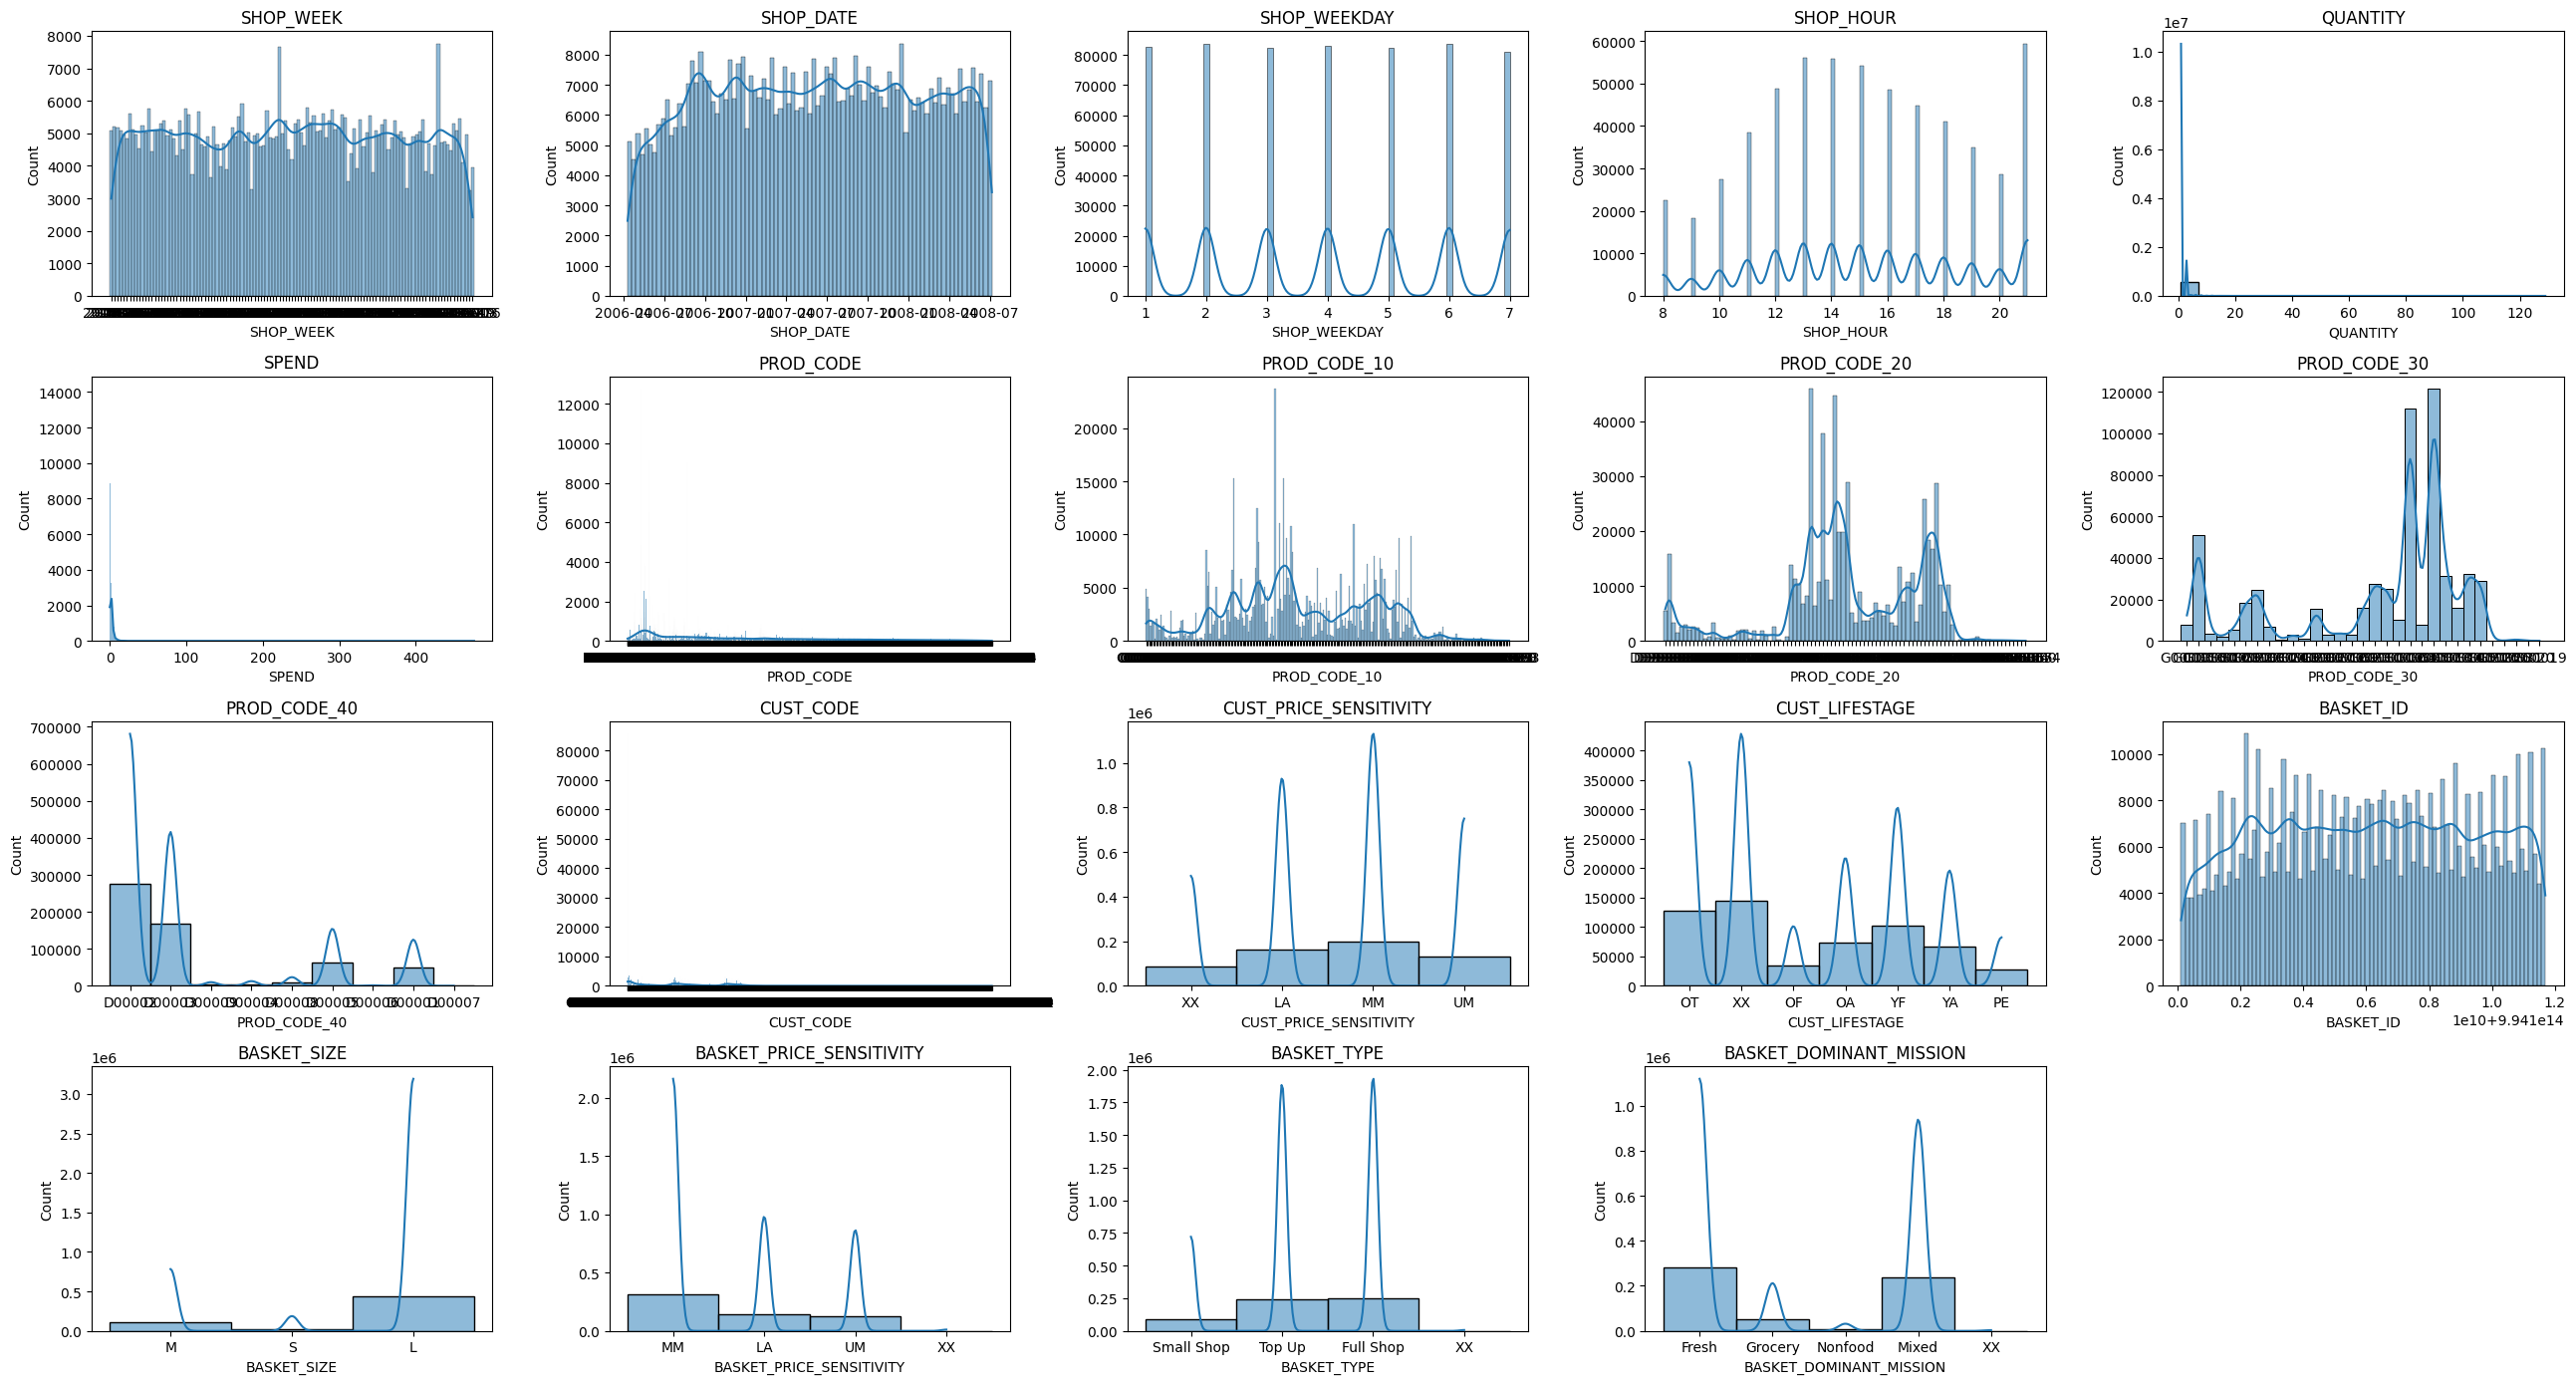

In [5]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(26,14) )

for i,ax in enumerate(axes.flat):
    if i < 19:
        g = sns.histplot(data=df, x=df.columns[i], kde=True, ax = ax)
        g.set_title(df.columns[i])
    else :
        fig.delaxes(ax)
    
# fig.suptitle("Overall")
fig.tight_layout()
plt.show()

In [6]:
# add column

df['total_sales'] = df['SPEND']*df['QUANTITY']


<h4>Create customer single view table</h4>

In [7]:
## Create an important features to perform customer single view ##

# import datetime as dt

newdf = pd.DataFrame( df['CUST_CODE'].unique() ).rename(columns={0:'cust_id'})

totalspend = pd.DataFrame(df.groupby(by=['CUST_CODE'],group_keys=True)
                          .apply( lambda x: sum(x['total_sales']) )
                          ).rename(columns={0:'total_spend'})

tm = pd.DataFrame(df.groupby(by=['CUST_CODE', 
                                 pd.Grouper(key='SHOP_DATE', freq='3M')])['total_sales']
                                 .agg('sum')
                  ).groupby('CUST_CODE').agg('mean').rename(columns={'total_sales':'total_av_3m'})

sm = pd.DataFrame(df.groupby(by=['CUST_CODE', 
                                 pd.Grouper(key='SHOP_DATE', freq='6M')])['total_sales']
                                 .agg('sum')
                  ).groupby('CUST_CODE').agg('mean').rename(columns={'total_sales':'total_av_6m'})

yearly = pd.DataFrame( df.groupby(by=['CUST_CODE', 
                                      pd.Grouper(key='SHOP_DATE', freq='Y')])['total_sales']
                                      .agg('sum')
                  ).groupby('CUST_CODE').agg('mean').rename(columns={'total_sales':'total_av_12m'})

qty_3m = pd.DataFrame( df.groupby(by=['CUST_CODE', 
                                      pd.Grouper(key='SHOP_DATE', freq='3M')])['QUANTITY']
                                      .agg('sum')
                  ).groupby('CUST_CODE').agg('mean').rename(columns={'QUANTITY':'qty_av_3m'})

qty_yearly = pd.DataFrame( df.groupby(by=['CUST_CODE', 
                                      pd.Grouper(key='SHOP_DATE', freq='Y')])['QUANTITY']
                                      .agg('sum')
                  ).groupby('CUST_CODE').agg('mean').rename(columns={'QUANTITY':'qty_av_12m'})

sku = pd.DataFrame(df.groupby(by=['CUST_CODE'])
                   .apply( 
                       lambda x : round( (len(x['PROD_CODE'].unique())/(df['PROD_CODE'].nunique()))*100
                                        , 2 )
                       )
                            ).rename(columns={0:'sku_penetrate(%)'})

In [8]:
# JOIN them(above) together

ls = [totalspend,tm,sm,yearly,qty_3m,qty_yearly,sku]
for i in (ls):
    newdf = pd.merge( newdf,i,left_on=['cust_id'],right_on=['CUST_CODE'] )

# JOIN Others

namecol = ['CUST_LIFESTAGE','CUST_PRICE_SENSITIVITY','BASKET_SIZE','BASKET_TYPE','BASKET_PRICE_SENSITIVITY','BASKET_DOMINANT_MISSION',
           'SHOP_WEEKDAY','SHOP_HOUR','PROD_CODE']
newname = ['life_stage','cust_price_sensitivity','most_bsk_size','most_bsk_type','most_price_sensitivity','most_cat',
           'most_weekday','most_coming_time','most_purchase_prod']

for i,j in zip(namecol,newname):
   bc = pd.DataFrame(df.groupby(by=['CUST_CODE'])[i]
                        .apply(pd.Series.mode)
                           ).rename(columns={i:j})
   
   newdf = pd.merge( newdf,bc,left_on=['cust_id'],right_on=['CUST_CODE'] )


In [9]:
newdf['clv'] = (newdf['total_av_12m']/newdf['qty_av_12m'])*3

In [10]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18151 entries, 0 to 18150
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_id                 18151 non-null  object 
 1   total_spend             18151 non-null  float64
 2   total_av_3m             18151 non-null  float64
 3   total_av_6m             18151 non-null  float64
 4   total_av_12m            18151 non-null  float64
 5   qty_av_3m               18151 non-null  float64
 6   qty_av_12m              18151 non-null  float64
 7   sku_penetrate(%)        18151 non-null  float64
 8   life_stage              18151 non-null  object 
 9   cust_price_sensitivity  18151 non-null  object 
 10  most_bsk_size           18151 non-null  object 
 11  most_bsk_type           18151 non-null  object 
 12  most_price_sensitivity  18151 non-null  object 
 13  most_cat                18151 non-null  object 
 14  most_weekday            18151 non-null

# STEP 2

- Customer segmentation (by K-Means)

In [11]:
#pip install prince
#pip install yellowbrick

In [12]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer


df_forkmean = newdf.drop(columns='cust_id')

numeric_features = ["total_spend","total_av_3m","total_av_6m","total_av_12m", "sku_penetrate(%)"]
cat_feature = ['life_stage','cust_price_sensitivity','most_bsk_size','most_bsk_type','most_price_sensitivity','most_cat',
       'most_weekday','most_coming_time','most_purchase_prod']

# Define method

mmScaler = MinMaxScaler()
oneHencd = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", mmScaler, numeric_features),
        ("cat", oneHencd, cat_feature),
    ]
)

<h3>Dimensionality reduction</h3>

- My Current Data: Mixed Data, Including Numerical and Categorical Data
- Performing Dimensionality Reduction by using PCA ( TruncatedSVD )

In [13]:
# Prepare data for an Elbow Visualization & Clustering

bfu = Pipeline(
    steps=[("preprocessor", preprocessor),
           ('PCA',TruncatedSVD(n_components=2, random_state=42))
           ])

dfk = bfu.fit_transform(df_forkmean)

dfk = pd.DataFrame(dfk)
display(dfk)

,0,1
0,1.501935,1.167362
1,1.502041,1.167196
2,1.502508,1.167578
3,1.502416,1.168584
4,1.502967,1.166800
...,...,...
18146,1.506999,0.796055
18147,1.491427,0.778711
18148,1.366566,1.218755
18149,1.383450,1.219752


Finding the best K 

- by using Elbow Method

/Users/hikarii/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/hikarii/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/hikarii/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/hikarii/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/hikar

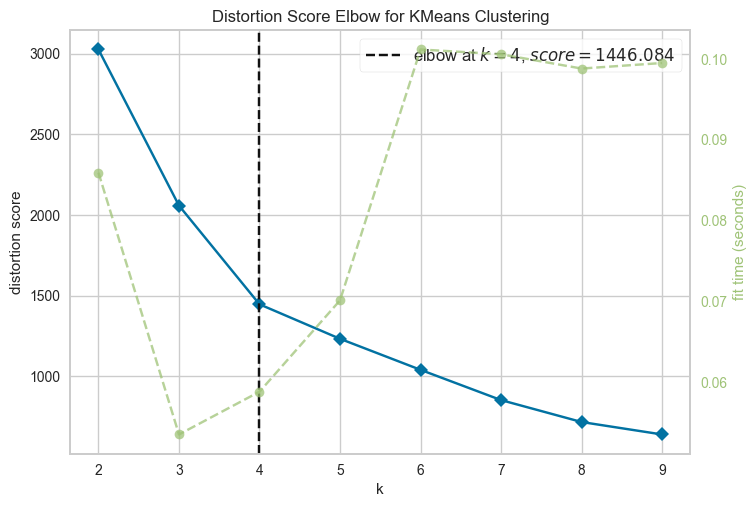

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
km = KMeans()

visualizer = KElbowVisualizer(km, k=(2,10))
visualizer.fit(dfk)
visualizer.show() 

<h3>RESULTS</h3>

In [15]:
cl = KMeans(n_clusters=4, random_state=0)

newdf['cluster'] = cl.fit(dfk).labels_
newdf

/Users/hikarii/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,cust_id,total_spend,total_av_3m,total_av_6m,total_av_12m,qty_av_3m,qty_av_12m,sku_penetrate(%),life_stage,cust_price_sensitivity,most_bsk_size,most_bsk_type,most_price_sensitivity,most_cat,most_weekday,most_coming_time,most_purchase_prod,clv,cluster
0,CUST0000804514,20.23,20.23,20.23,20.23,6.0,6.0,0.12,OT,XX,M,Small Shop,MM,Fresh,6,8,PRD0900071,10.115,1
1,CUST0000804514,20.23,20.23,20.23,20.23,6.0,6.0,0.12,OT,XX,M,Small Shop,MM,Fresh,6,8,PRD0900339,10.115,1
2,CUST0000804514,20.23,20.23,20.23,20.23,6.0,6.0,0.12,OT,XX,M,Small Shop,MM,Fresh,6,8,PRD0901335,10.115,1
3,CUST0000804514,20.23,20.23,20.23,20.23,6.0,6.0,0.12,OT,XX,M,Small Shop,MM,Fresh,6,8,PRD0902376,10.115,1
4,CUST0000804514,20.23,20.23,20.23,20.23,6.0,6.0,0.12,OT,XX,M,Small Shop,MM,Fresh,6,8,PRD0902728,10.115,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18146,CUST0000278162,2.00,2.00,2.00,2.00,2.0,2.0,0.04,XX,MM,S,Small Shop,MM,Mixed,5,16,PRD0900121,3.000,1
18147,CUST0000278162,2.00,2.00,2.00,2.00,2.0,2.0,0.04,XX,MM,S,Small Shop,MM,Mixed,5,16,PRD0900674,3.000,2
18148,CUST0000352552,0.63,0.63,0.63,0.63,1.0,1.0,0.02,YF,MM,S,Small Shop,MM,Grocery,2,13,PRD0900833,1.890,1
18149,CUST0000218304,1.54,1.54,1.54,1.54,1.0,1.0,0.02,OA,UM,S,Small Shop,MM,Fresh,5,19,PRD0904358,4.620,1


/var/folders/k7/57xbh50s7799309gsby1ghx00000gn/T/ipykernel_25675/3065689200.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


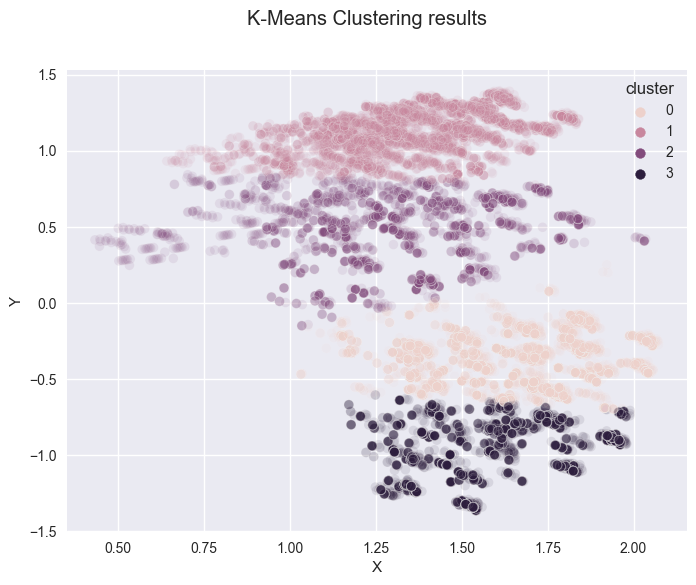

In [16]:
# Getting unique labels
 
dfk['cluster'] = newdf['cluster']
 
# plotting the results:
 
plt.style.use('seaborn')

fig, axe = plt.subplots(figsize=(8,6))

g = sns.scatterplot(data = dfk , x=0, y=1, hue="cluster", ax=axe ,alpha=0.1)
axe.set(xlabel='X', ylabel='Y')
fig.suptitle("K-Means Clustering results")
plt.show()


<h3>Misc. (miscellaneous)</h3>

In [17]:
sc_newdf = pd.DataFrame(newdf.groupby('cust_id').agg(pd.Series.mode))
sc_newdf

,total_spend,total_av_3m,total_av_6m,total_av_12m,qty_av_3m,qty_av_12m,sku_penetrate(%),life_stage,cust_price_sensitivity,most_bsk_size,most_bsk_type,most_price_sensitivity,most_cat,most_weekday,most_coming_time,most_purchase_prod,clv,cluster
cust_id,,,,,,,,,,,,,,,,,,
CUST0000000181,2.44,2.440000,2.440000,2.440000,1.000,1.000000,0.02,XX,MM,S,Small Shop,MM,Fresh,7,13,PRD0901946,7.320000,1
CUST0000000689,817.39,163.478000,272.463333,408.695000,66.800,167.000000,2.35,XX,LA,L,Full Shop,LA,Mixed,2,21,PRD0900873,7.341826,3
CUST0000000998,7.63,7.630000,7.630000,7.630000,6.000,6.000000,0.08,XX,XX,S,Small Shop,MM,"[Grocery, Nonfood]",1,"[8, 15]","[PRD0901170, PRD0903905, PRD0904460, PRD0904594]",3.815000,1
CUST0000001163,66.38,16.595000,22.126667,22.126667,8.500,11.333333,0.49,XX,MM,L,Top Up,MM,Fresh,"[1, 7]",16,PRD0901927,5.857059,0
CUST0000001194,4678.05,467.805000,779.675000,1559.350000,170.500,568.333333,8.16,OT,MM,L,Full Shop,MM,Fresh,6,19,PRD0902560,8.231173,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CUST0000999544,6.32,6.320000,6.320000,6.320000,1.000,1.000000,0.02,PE,UM,S,Small Shop,MM,Nonfood,6,19,PRD0904602,18.960000,1
CUST0000999593,802.66,100.332500,200.665000,267.553333,49.375,131.666667,4.17,YF,MM,L,Top Up,MM,Fresh,1,16,PRD0900859,6.096152,0
CUST0000999935,862.97,123.281429,215.742500,287.656667,49.000,114.333333,2.57,YF,LA,L,Full Shop,LA,Fresh,4,16,"[PRD0900986, PRD0901704]",7.547843,3


In [20]:
#newdf.to_csv('~/Documents/DATAScience/College/dataset/custsv.csv')
#sc_newdf.to_csv('~/Documents/DATAScience/College/dataset/custsv_RowPerID.csv')